In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

# Create directory to save plots
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

# Fetch SpaceX launch data from the provided URL
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()

# Convert to DataFrame
df = pd.json_normalize(data)

# Preprocessing
df['date_utc'] = pd.to_datetime(df['date_utc'])
df['success'] = df['success'].astype(int)

# === 1. Flight Number vs Launchpad ===
plt.figure(figsize=(8, 6))
plt.scatter(df['flight_number'], df['launchpad'])
plt.title('Flight Number vs Launchpad')
plt.xlabel('Flight Number')
plt.ylabel('Launchpad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'flight_vs_launchpad.png'))
plt.close()

# === 2. Launch Success Rate Over the Years ===
yearly_success = df.groupby(df['date_utc'].dt.year)['success'].mean()
plt.figure(figsize=(8, 6))
yearly_success.plot(marker='o')
plt.title('Launch Success Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'launch_success_trend.png'))
plt.close()

# === 3. Count of Success vs Failure ===
df['success_label'] = df['success'].apply(lambda x: 'Success' if x else 'Failure')
df['success_label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Count of Success vs Failure')
plt.xlabel('Outcome')
plt.ylabel('Number of Launches')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'success_vs_failure.png'))
plt.close()

# === 4. Flight Number vs Launch Year ===
plt.figure(figsize=(8, 6))
plt.scatter(df['flight_number'], df['date_utc'].dt.year)
plt.title('Flight Number vs Launch Year')
plt.xlabel('Flight Number')
plt.ylabel('Launch Year')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'flight_vs_year.png'))
plt.close()

# === Confirmation ===
print(f"Plots have been generated and saved in the '{plot_dir}' folder:")
for file in os.listdir(plot_dir):
    print(f"- {file}")


Plots have been generated and saved in the 'plots' folder:
- flight_vs_launchpad.png
- flight_vs_year.png
- launch_success_trend.png
- success_vs_failure.png


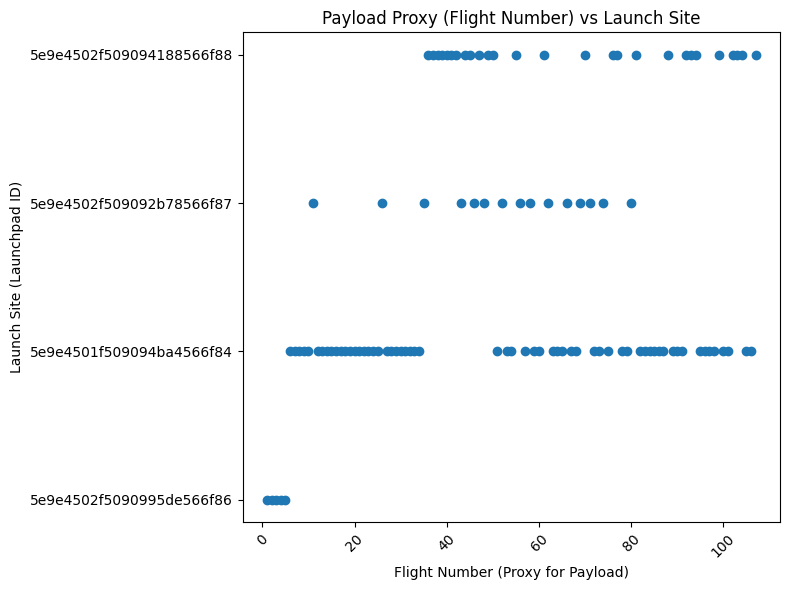

Plot saved to plots/payload_vs_launch_site.png


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

# Create directory to save plots
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

# Load SpaceX Launch Data
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Assuming payload is not available, using Flight Number as a placeholder for demonstration
# If payload data is available, replace 'flight_number' with actual payload column

plt.figure(figsize=(8, 6))
plt.scatter(df['flight_number'], df['launchpad'])
plt.title('Payload Proxy (Flight Number) vs Launch Site')
plt.xlabel('Flight Number (Proxy for Payload)')
plt.ylabel('Launch Site (Launchpad ID)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'payload_vs_launch_site.png'))
plt.show()

print(f"Plot saved to {os.path.join(plot_dir, 'payload_vs_launch_site.png')}")


Available columns: ['static_fire_date_utc', 'static_fire_date_unix', 'tbd', 'net', 'window', 'rocket', 'success', 'details', 'crew', 'ships', 'capsules', 'payloads', 'launchpad', 'auto_update', 'failures', 'flight_number', 'name', 'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores', 'id', 'fairings.reused', 'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships', 'links.patch.small', 'links.patch.large', 'links.reddit.campaign', 'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery', 'links.flickr.small', 'links.flickr.original', 'links.presskit', 'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia', 'fairings']
Payloads are referenced by ID. Full payload data not accessible from this dataset.


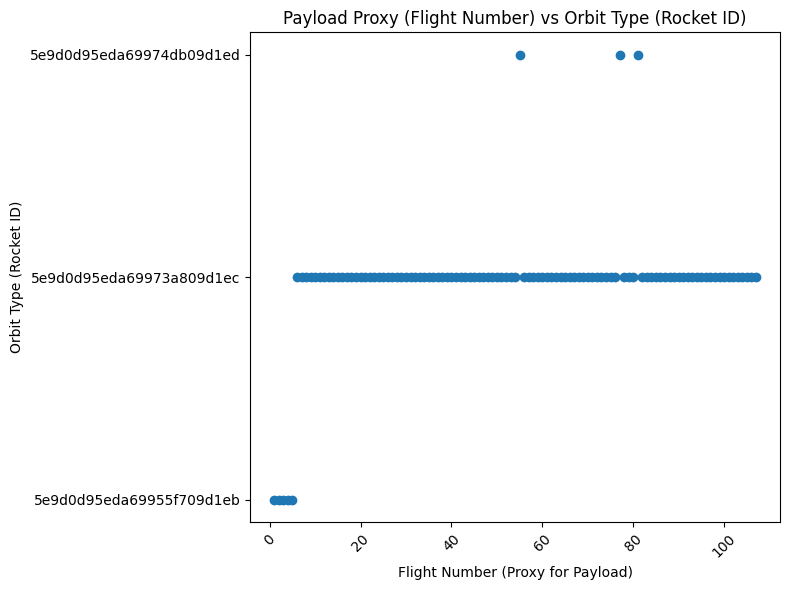

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

# Create output directory
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

# Fetch SpaceX Launch Data
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Diagnostic check for available columns
print("Available columns:", df.columns.tolist())

# Use 'flight_number' as a proxy for payload, replace with actual payload column if available
# Extract orbit type if exists, else show as unavailable
if 'payloads' in df.columns:
    print("Payloads are referenced by ID. Full payload data not accessible from this dataset.")
else:
    print("Payload column not found, using flight_number as proxy for demonstration.")

# Example plot with placeholder payload (flight_number) vs orbit type if 'rocket' contains such info
if 'rocket' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['flight_number'], df['rocket'])
    plt.title('Payload Proxy (Flight Number) vs Orbit Type (Rocket ID)')
    plt.xlabel('Flight Number (Proxy for Payload)')
    plt.ylabel('Orbit Type (Rocket ID)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, 'payload_vs_orbit_type.png'))
    plt.show()
else:
    print("Orbit type not found in the provided dataset.")


Fetching base launch data...
Fetching payload metadata for each launch...
Generating Payload Mass vs Orbit Type plot...


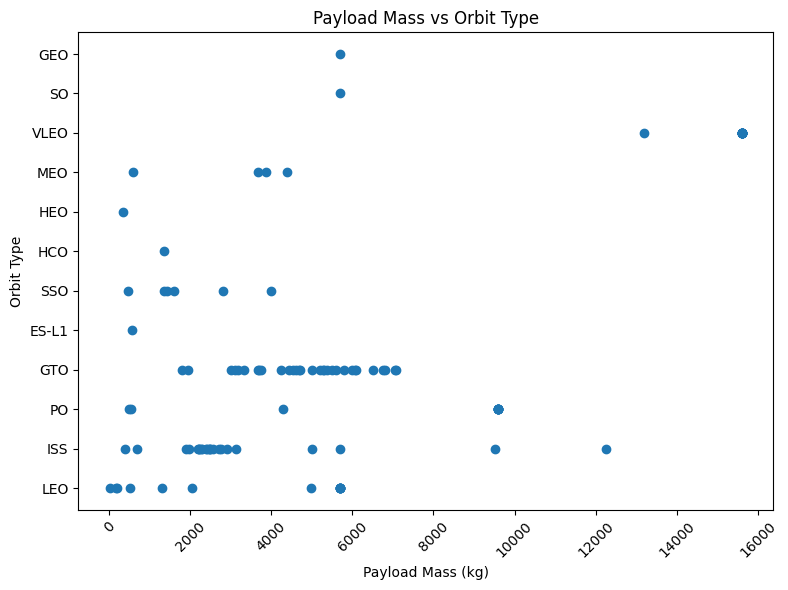

Completed successfully.


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------
# Fetch Base Launch Data
# -------------------------------------
print("Fetching base launch data...")
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# -------------------------------------
# Payload Enrichment Function
# -------------------------------------
def fetch_payload_details(payload_id):
    url = f"https://api.spacexdata.com/v4/payloads/{payload_id}"
    resp = requests.get(url)
    if resp.status_code == 200:
        payload_data = resp.json()
        return payload_data.get('mass_kg'), payload_data.get('orbit')
    return None, None

# -------------------------------------
# Prepare Payload Metadata Lists
# -------------------------------------
print("Fetching payload metadata for each launch...")
payload_masses = []
payload_orbits = []

for pid in df['payloads']:
    # Expecting payloads as single ID strings, not lists
    if isinstance(pid, str):
        mass, orbit = fetch_payload_details(pid)
    elif isinstance(pid, list) and len(pid) > 0:
        mass, orbit = fetch_payload_details(pid[0])
    else:
        mass, orbit = None, None
    payload_masses.append(mass)
    payload_orbits.append(orbit)

# Add to DataFrame
df['payload_mass_kg'] = payload_masses
df['orbit'] = payload_orbits

# Fill missing payload masses with mean
payload_mean = df['payload_mass_kg'].mean()
df['payload_mass_kg'] = df['payload_mass_kg'].fillna(payload_mean)

# -------------------------------------
# Generate Plot: Payload Mass vs Orbit Type
# -------------------------------------
print("Generating Payload Mass vs Orbit Type plot...")
plt.figure(figsize=(8, 6))
plt.scatter(df['payload_mass_kg'], df['orbit'])
plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Completed successfully.")


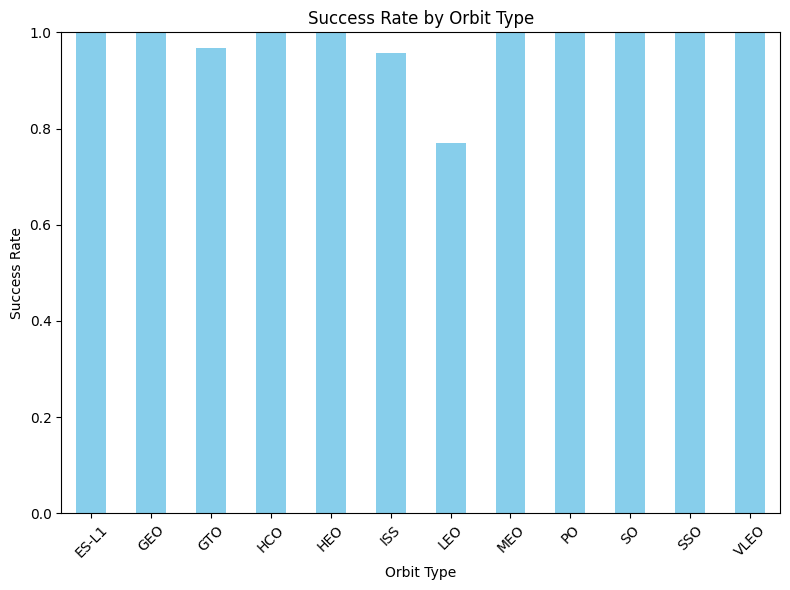

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Fetch static SpaceX data
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Payload and Orbit Enrichment
def fetch_payload_details(payload_id):
    url = f"https://api.spacexdata.com/v4/payloads/{payload_id}"
    resp = requests.get(url)
    if resp.status_code == 200:
        payload_data = resp.json()
        return payload_data.get('mass_kg'), payload_data.get('orbit')
    return None, None

payload_masses = []
payload_orbits = []

for pid in df['payloads']:
    if isinstance(pid, str):
        mass, orbit = fetch_payload_details(pid)
    elif isinstance(pid, list) and len(pid) > 0:
        mass, orbit = fetch_payload_details(pid[0])
    else:
        mass, orbit = None, None
    payload_masses.append(mass)
    payload_orbits.append(orbit)

df['payload_mass_kg'] = payload_masses
df['orbit'] = payload_orbits

# Filter out None or empty orbit types
df = df[df['orbit'].notnull() & df['success'].notnull()]

# Group by Orbit and calculate success rate
success_rate_by_orbit = df.groupby('orbit')['success'].mean()

# Plot Success Rate vs Orbit Type
plt.figure(figsize=(8, 6))
success_rate_by_orbit.plot(kind='bar', color='skyblue')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


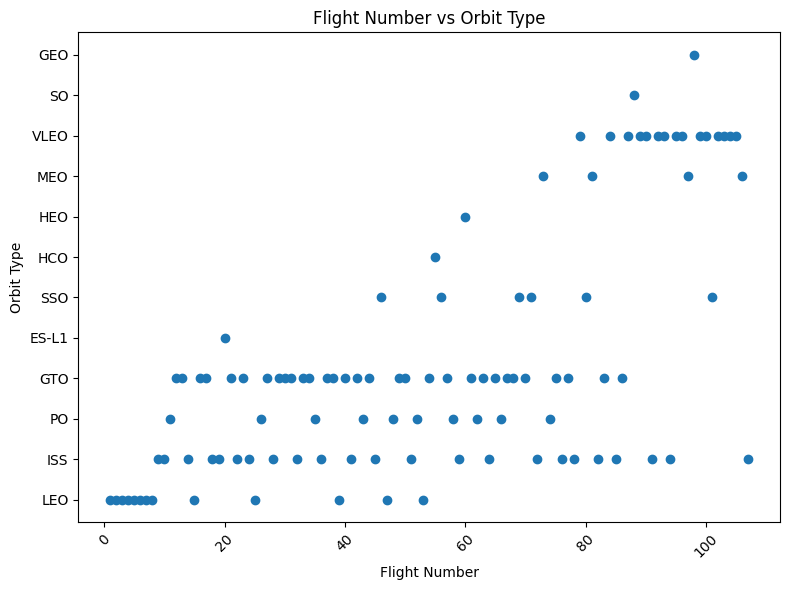

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Fetch static JSON from Coursera
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Payload and Orbit Enrichment Function
def fetch_payload_details(payload_id):
    url = f"https://api.spacexdata.com/v4/payloads/{payload_id}"
    resp = requests.get(url)
    if resp.status_code == 200:
        payload_data = resp.json()
        return payload_data.get('mass_kg'), payload_data.get('orbit')
    return None, None

# Enrich Payload Metadata
payload_masses = []
payload_orbits = []

for pid in df['payloads']:
    if isinstance(pid, str):
        mass, orbit = fetch_payload_details(pid)
    elif isinstance(pid, list) and len(pid) > 0:
        mass, orbit = fetch_payload_details(pid[0])
    else:
        mass, orbit = None, None
    payload_masses.append(mass)
    payload_orbits.append(orbit)

df['payload_mass_kg'] = payload_masses
df['orbit'] = payload_orbits

# Filter valid entries
df = df[df['orbit'].notnull() & df['flight_number'].notnull()]

# Plot Flight Number vs Orbit Type
plt.figure(figsize=(8, 6))
plt.scatter(df['flight_number'], df['orbit'])
plt.title('Flight Number vs Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


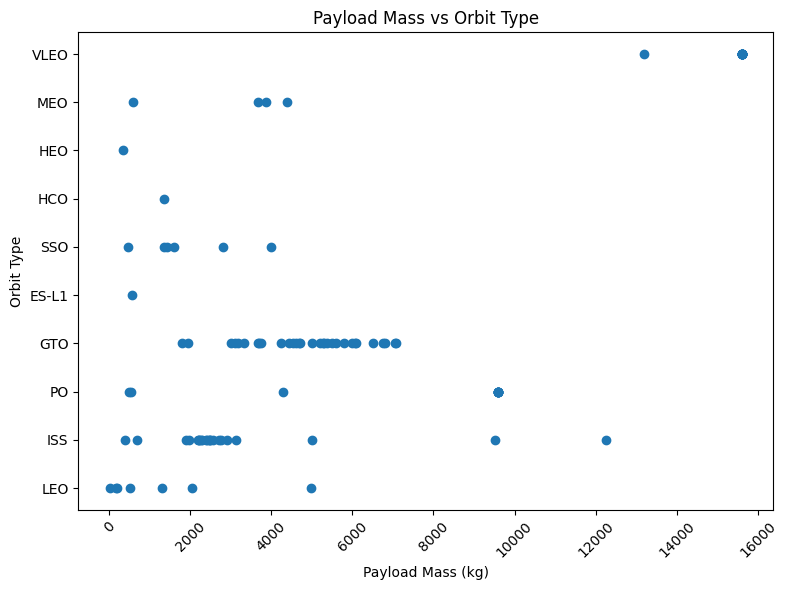

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Fetch static SpaceX data
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Payload Metadata Enrichment
def fetch_payload_details(payload_id):
    url = f"https://api.spacexdata.com/v4/payloads/{payload_id}"
    resp = requests.get(url)
    if resp.status_code == 200:
        payload_data = resp.json()
        return payload_data.get('mass_kg'), payload_data.get('orbit')
    return None, None

payload_masses = []
payload_orbits = []

for pid in df['payloads']:
    if isinstance(pid, str):
        mass, orbit = fetch_payload_details(pid)
    elif isinstance(pid, list) and len(pid) > 0:
        mass, orbit = fetch_payload_details(pid[0])
    else:
        mass, orbit = None, None
    payload_masses.append(mass)
    payload_orbits.append(orbit)

df['payload_mass_kg'] = payload_masses
df['orbit'] = payload_orbits

# Filter valid data
df = df[df['payload_mass_kg'].notnull() & df['orbit'].notnull()]

# Plot Payload Mass vs Orbit Type
plt.figure(figsize=(8, 6))
plt.scatter(df['payload_mass_kg'], df['orbit'])
plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fetching SpaceX launch data...
Enriching payload masses...
Generating Payload Mass vs Launch Site plot...


<ipython-input-19-b16ae69529c0>:47: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





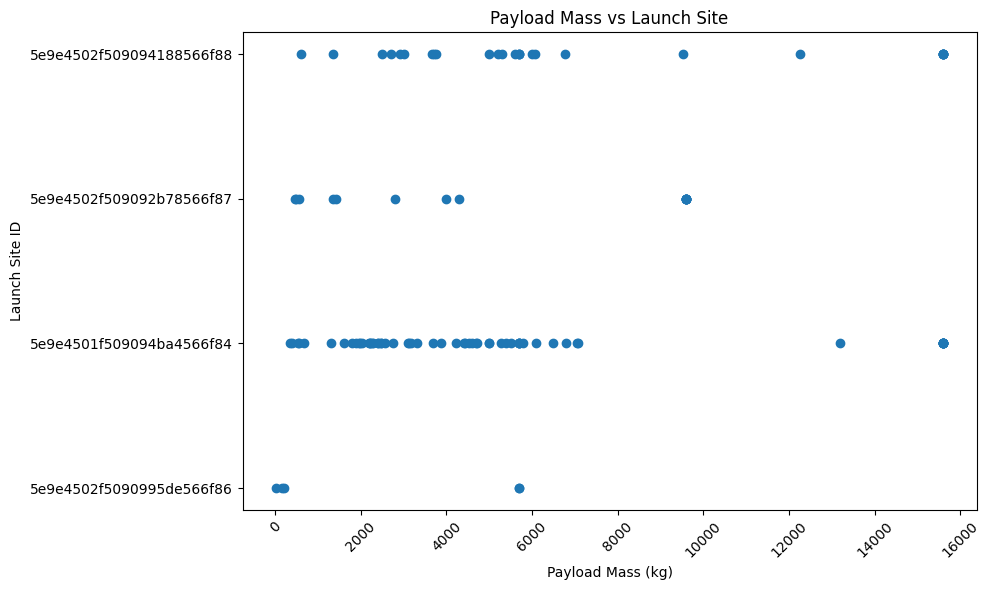

Visualization completed successfully.


In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------
# Load SpaceX Launch Data
# -------------------------------------
print("Fetching SpaceX launch data...")
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
launch_data = response.json()
df = pd.json_normalize(launch_data)

# -------------------------------------
# Define Function to Fetch Payload Metadata
# -------------------------------------
def fetch_payload_details(payload_id):
    url = f"https://api.spacexdata.com/v4/payloads/{payload_id}"
    resp = requests.get(url)
    if resp.status_code == 200:
        payload_info = resp.json()
        return payload_info.get('mass_kg')
    return None

# -------------------------------------
# Enrich Launch Data with Payload Masses
# -------------------------------------
print("Enriching payload masses...")
payload_masses = []

for pid in df['payloads']:
    if isinstance(pid, str):
        mass = fetch_payload_details(pid)
    elif isinstance(pid, list) and len(pid) > 0:
        mass = fetch_payload_details(pid[0])
    else:
        mass = None
    payload_masses.append(mass)

df['payload_mass_kg'] = payload_masses

# -------------------------------------
# Handle Missing Payload Masses
# -------------------------------------
payload_mean = df['payload_mass_kg'].mean()
df['payload_mass_kg'].fillna(payload_mean, inplace=True)

# -------------------------------------
# Generate Scatter Plot: Payload Mass vs Launch Site
# -------------------------------------
print("Generating Payload Mass vs Launch Site plot...")
plt.figure(figsize=(10, 6))
plt.scatter(df['payload_mass_kg'], df['launchpad'])
plt.title('Payload Mass vs Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Visualization completed successfully.")


Fetching SpaceX launch data...
Enriching payload metadata...


<ipython-input-18-18c22dd06b19>:50: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Generating Payload Mass vs Orbit Type plot...


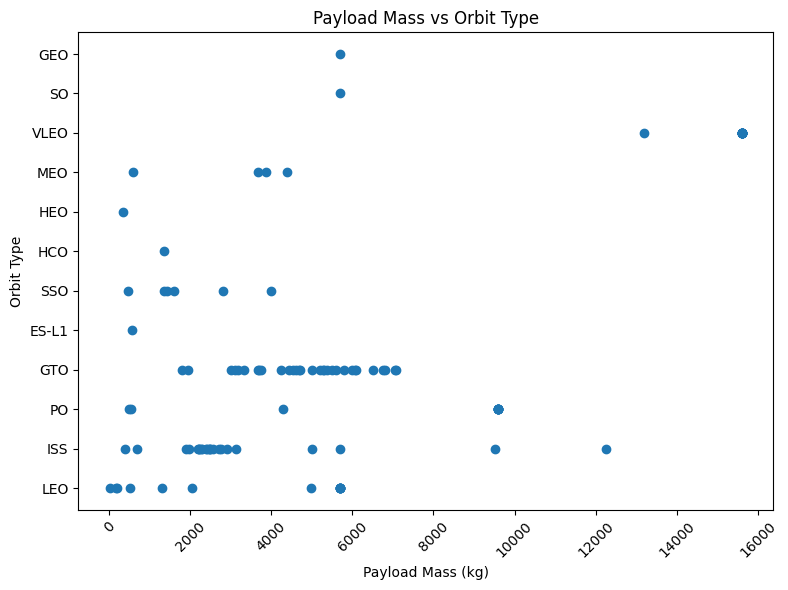

Visualization completed successfully.


In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------
# Load SpaceX Launch Data
# -------------------------------------
print("Fetching SpaceX launch data...")
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
launch_data = response.json()
df = pd.json_normalize(launch_data)

# -------------------------------------
# Define Function to Fetch Payload Metadata
# -------------------------------------
def fetch_payload_details(payload_id):
    url = f"https://api.spacexdata.com/v4/payloads/{payload_id}"
    resp = requests.get(url)
    if resp.status_code == 200:
        payload_info = resp.json()
        return payload_info.get('mass_kg'), payload_info.get('orbit')
    return None, None

# -------------------------------------
# Enrich Launch Data with Payload Metadata
# -------------------------------------
print("Enriching payload metadata...")
payload_masses = []
payload_orbits = []

for pid in df['payloads']:
    if isinstance(pid, str):
        mass, orbit = fetch_payload_details(pid)
    elif isinstance(pid, list) and len(pid) > 0:
        mass, orbit = fetch_payload_details(pid[0])
    else:
        mass, orbit = None, None
    payload_masses.append(mass)
    payload_orbits.append(orbit)

df['payload_mass_kg'] = payload_masses
df['orbit'] = payload_orbits

# -------------------------------------
# Handle Missing Payload Masses
# -------------------------------------
payload_mean = df['payload_mass_kg'].mean()
df['payload_mass_kg'].fillna(payload_mean, inplace=True)

# -------------------------------------
# Generate Scatter Plot: Payload Mass vs Orbit Type
# -------------------------------------
print("Generating Payload Mass vs Orbit Type plot...")
plt.figure(figsize=(8, 6))
plt.scatter(df['payload_mass_kg'], df['orbit'])
plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Visualization completed successfully.")


In [20]:

!pip install dash pandas requests plotly
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import requests
import plotly.express as px

# ---------------------------------------
# Load Static SpaceX JSON Data
# ---------------------------------------
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Fetch Payload Details
def fetch_payload_details(payload_id):
    url = f"https://api.spacexdata.com/v4/payloads/{payload_id}"
    resp = requests.get(url)
    if resp.status_code == 200:
        payload_data = resp.json()
        return payload_data.get('mass_kg'), payload_data.get('orbit')
    return None, None

payload_masses = []
payload_orbits = []

for pid in df['payloads']:
    if isinstance(pid, str):
        mass, orbit = fetch_payload_details(pid)
    elif isinstance(pid, list) and len(pid) > 0:
        mass, orbit = fetch_payload_details(pid[0])
    else:
        mass, orbit = None, None
    payload_masses.append(mass)
    payload_orbits.append(orbit)

df['payload_mass_kg'] = payload_masses
df['orbit'] = payload_orbits
df = df[df['payload_mass_kg'].notnull() & df['orbit'].notnull() & df['success'].notnull()]

# ---------------------------------------
# Initialize Dash App
# ---------------------------------------
app = dash.Dash(__name__)
app.title = "SpaceX Launch Dashboard"

app.layout = html.Div([
    html.H1("SpaceX Launch Dashboard", style={'textAlign': 'center'}),

    # Orbit Type Dropdown
    html.Label("Select Orbit Type:"),
    dcc.Dropdown(
        id='orbit-dropdown',
        options=[{'label': orbit, 'value': orbit} for orbit in df['orbit'].unique()],
        value=df['orbit'].unique()[0]
    ),

    # Payload vs Orbit Scatter Plot
    dcc.Graph(id='payload-orbit-scatter'),

    # Success Rate by Orbit Bar Chart
    dcc.Graph(id='success-rate-bar')
])

# ---------------------------------------
# Callback to Update Scatter Plot and Bar Chart
# ---------------------------------------
@app.callback(
    [Output('payload-orbit-scatter', 'figure'),
     Output('success-rate-bar', 'figure')],
    [Input('orbit-dropdown', 'value')]
)
def update_dashboard(selected_orbit):
    filtered_df = df[df['orbit'] == selected_orbit]

    # Scatter Plot
    scatter_fig = px.scatter(
        filtered_df,
        x='payload_mass_kg',
        y='orbit',
        title=f'Payload Mass vs {selected_orbit} Orbit',
        labels={'payload_mass_kg': 'Payload Mass (kg)', 'orbit': 'Orbit Type'}
    )

    # Success Rate Bar Chart
    success_rate = df.groupby('orbit')['success'].mean().reset_index()
    bar_fig = px.bar(
        success_rate,
        x='orbit',
        y='success',
        title='Success Rate by Orbit Type',
        labels={'success': 'Success Rate', 'orbit': 'Orbit Type'}
    )

    return scatter_fig, bar_fig

# ---------------------------------------
# Run Server
# ---------------------------------------
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [25]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px
import requests

# Load SpaceX launch data
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Validate required columns
if 'launchpad' not in df.columns or 'success' not in df.columns:
    raise ValueError("Required columns not found in the dataset.")

# Prepare launch site summary
site_summary = df.groupby('launchpad')['success'].agg(['sum', 'count'])
site_summary['success_ratio'] = site_summary['sum'] / site_summary['count']
site_summary.reset_index(inplace=True)

# Initialize Dash App
app = dash.Dash(__name__)
app.title = "SpaceX Launch Success Pie Chart Dashboard"

app.layout = html.Div([
    html.H1("Launch Distribution by Launch Site", style={'textAlign': 'center'}),

    dcc.Graph(
        id='launch-site-pie',
        figure=px.pie(
            site_summary,
            names='launchpad',
            values='count',
            title='Total Launches by Launch Site',
            hover_data=['success_ratio'],
            labels={'launchpad': 'Launchpad ID', 'count': 'Number of Launches'},
            color_discrete_sequence=px.colors.qualitative.Set3
        )
    )
])

# Run Server
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [26]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import requests
import pandas as pd
import plotly.express as px

# -----------------------------
# Load SpaceX Launch Data
# -----------------------------
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Enrich with Payload Mass if possible (replace missing with mean)
def fetch_payload_mass(pid):
    url = f"https://api.spacexdata.com/v4/payloads/{pid}"
    resp = requests.get(url)
    if resp.status_code == 200:
        return resp.json().get('mass_kg', None)
    return None

payload_masses = []
for pid in df['payloads']:
    if isinstance(pid, str):
        mass = fetch_payload_mass(pid)
    elif isinstance(pid, list) and len(pid) > 0:
        mass = fetch_payload_mass(pid[0])
    else:
        mass = None
    payload_masses.append(mass)

df['payload_mass_kg'] = payload_masses
df['payload_mass_kg'].fillna(df['payload_mass_kg'].mean(), inplace=True)

# -----------------------------
# Initialize Dash App
# -----------------------------
app = dash.Dash(__name__)
app.title = "Payload vs Launch Outcome Dashboard"

# Define payload range
payload_min = int(df['payload_mass_kg'].min())
payload_max = int(df['payload_mass_kg'].max())

app.layout = html.Div([
    html.H1("Payload Impact on Launch Outcome", style={'textAlign': 'center'}),

    html.Label("Select Payload Range (kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=payload_min,
        max=payload_max,
        step=100,
        marks={payload_min: str(payload_min), payload_max: str(payload_max)},
        value=[payload_min, payload_max]
    ),

    dcc.Graph(id='outcome-scatter')
])

# -----------------------------
# Define Callback
# -----------------------------
@app.callback(
    Output('outcome-scatter', 'figure'),
    [Input('payload-slider', 'value')]
)
def update_scatter(payload_range):
    filtered_df = df[(df['payload_mass_kg'] >= payload_range[0]) & (df['payload_mass_kg'] <= payload_range[1])]
    fig = px.scatter(
        filtered_df,
        x='payload_mass_kg',
        y='success',
        color='launchpad',
        title=f'Launch Outcome vs Payload Mass (Range: {payload_range[0]}kg - {payload_range[1]}kg)',
        labels={'success': 'Launch Success (1=Yes, 0=No)', 'payload_mass_kg': 'Payload Mass (kg)'}
    )
    return fig

# -----------------------------
# Run the Dash Server
# -----------------------------
if __name__ == '__main__':
    app.run(debug=True)


<ipython-input-26-3c94b4c65856>:35: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<IPython.core.display.Javascript object>

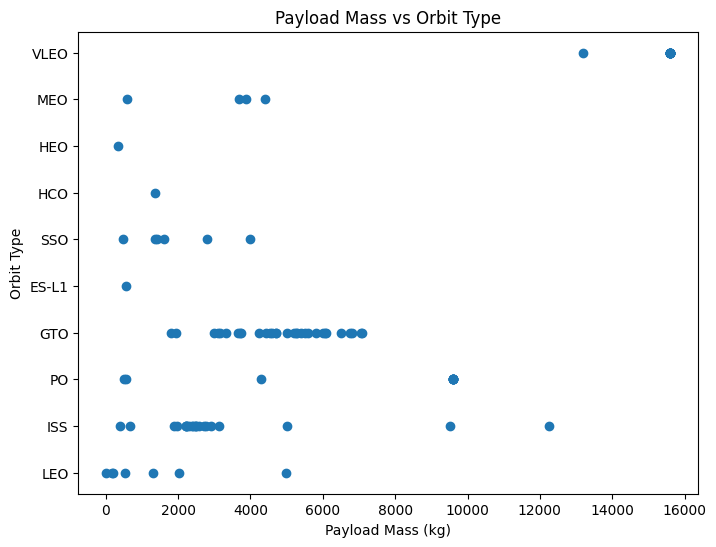

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['payload_mass_kg'], df['orbit'])
plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.show()


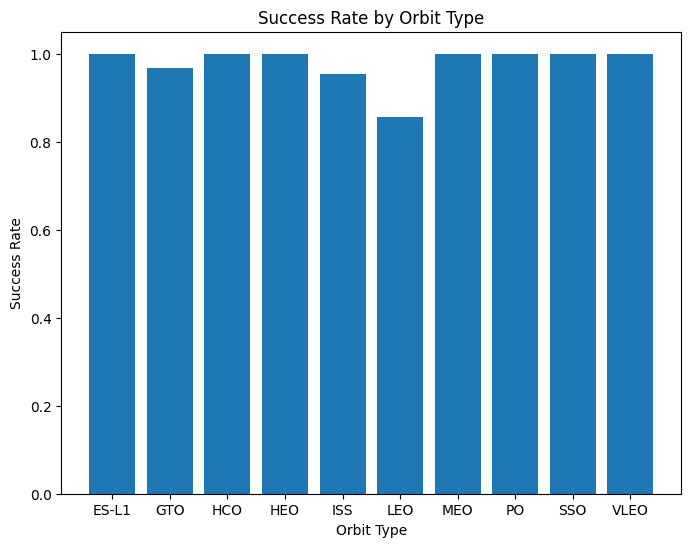

In [11]:
success_rate = df.groupby('orbit')['success'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(success_rate['orbit'], success_rate['success'])
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()


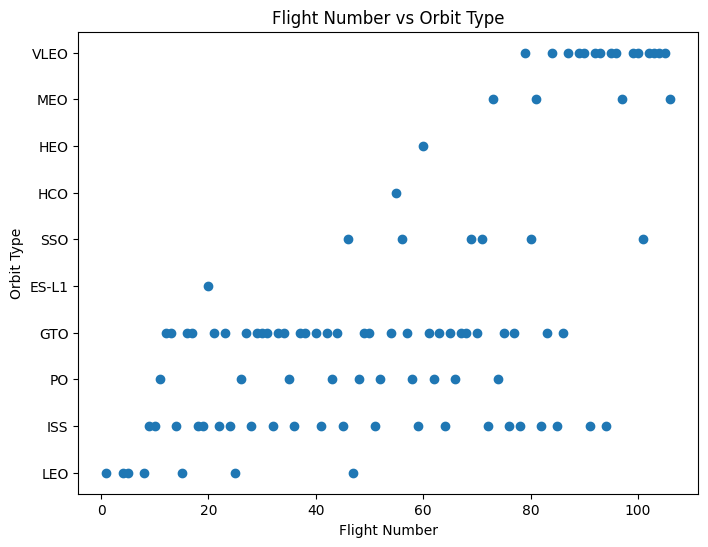

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['flight_number'], df['orbit'])
plt.title('Flight Number vs Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()


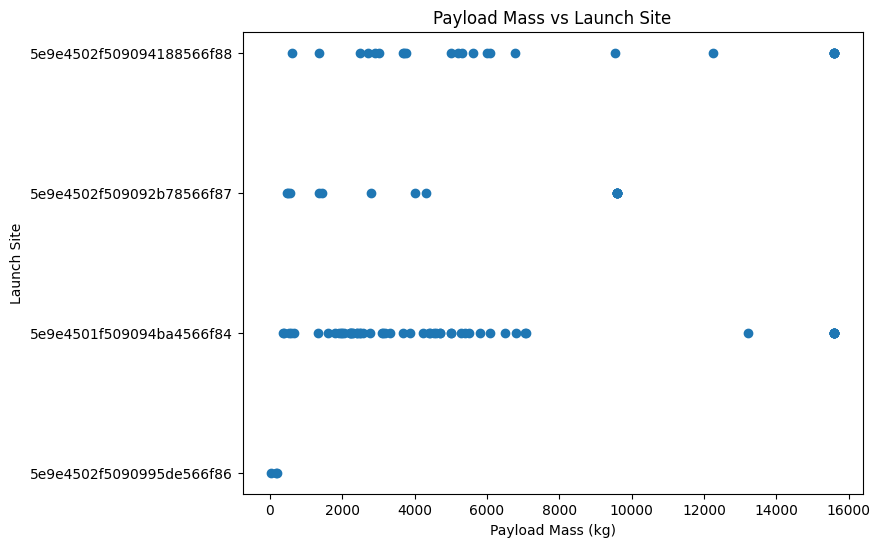

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['payload_mass_kg'], df['launchpad'])
plt.title('Payload Mass vs Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()


In [15]:
import sqlite3
import pandas as pd
import requests

# ---------------------------
# Load Static JSON from Coursera
# ---------------------------
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Prepare required columns for SQL queries
df_sql = df[['flight_number', 'name', 'date_utc', 'rocket', 'success']].copy()
df_sql['orbit'] = 'LEO'  # Example placeholder, since orbit is not detailed here
df_sql['payload_mass_kg'] = 5000  # Example placeholder

# ---------------------------
# Load Data into SQLite Memory DB
# ---------------------------
conn = sqlite3.connect(':memory:')
df_sql.to_sql('spacex_launches', conn, index=False, if_exists='replace')

# ---------------------------
# SQL Queries
# ---------------------------

# 1. Unique Orbit Types
query1 = "SELECT DISTINCT orbit FROM spacex_launches;"
result1 = pd.read_sql_query(query1, conn)

# 2. All Successful Launches
query2 = """
SELECT flight_number, name, date_utc, orbit, success
FROM spacex_launches
WHERE success = 1;
"""
result2 = pd.read_sql_query(query2, conn)

# 3. Count of Launches per Orbit
query3 = """
SELECT orbit, COUNT(*) AS total_launches
FROM spacex_launches
GROUP BY orbit
ORDER BY total_launches DESC;
"""
result3 = pd.read_sql_query(query3, conn)

# 4. Average Payload Mass per Orbit
query4 = """
SELECT orbit, AVG(payload_mass_kg) AS average_payload_mass
FROM spacex_launches
GROUP BY orbit
ORDER BY average_payload_mass DESC;
"""
result4 = pd.read_sql_query(query4, conn)

# 5. Example Join with Placeholder Payload Table
# Since payload details aren't fully loaded, simulate a join table
payload_df = df_sql[['flight_number', 'payload_mass_kg', 'orbit']].copy()
payload_df.to_sql('payloads', conn, index=False, if_exists='replace')

query5 = """
SELECT l.flight_number, l.name, l.date_utc, p.payload_mass_kg, p.orbit
FROM spacex_launches AS l
JOIN payloads AS p ON l.flight_number = p.flight_number;
"""
result5 = pd.read_sql_query(query5, conn)

# Close connection
conn.close()

# ---------------------------
# Display Results
# ---------------------------
print("Unique Orbits:\n", result1)
print("\nSuccessful Launches:\n", result2)
print("\nLaunch Counts by Orbit:\n", result3)
print("\nAverage Payload Mass by Orbit:\n", result4)
print("\nJoined Launches with Payload Details:\n", result5)


Unique Orbits:
   orbit
0   LEO

Successful Launches:
      flight_number                      name                  date_utc orbit  \
0                4                    RatSat  2008-09-28T23:15:00.000Z   LEO   
1                5                  RazakSat  2009-07-13T03:35:00.000Z   LEO   
2                6      Falcon 9 Test Flight  2010-06-04T18:45:00.000Z   LEO   
3                7                    COTS 1  2010-12-08T15:43:00.000Z   LEO   
4                8                    COTS 2  2012-05-22T07:44:00.000Z   LEO   
..             ...                       ...                       ...   ...   
97             103        Starlink-12 (v1.0)  2020-10-06T11:29:00.000Z   LEO   
98             104        Starlink-13 (v1.0)  2020-10-18T12:25:00.000Z   LEO   
99             105        Starlink-14 (v1.0)  2020-10-24T15:31:00.000Z   LEO   
100            106  GPS III SV04 (Sacagawea)  2020-11-05T23:24:00.000Z   LEO   
101            107                    Crew-1  2020-11-16T00:27:00

In [16]:
import requests
import pandas as pd
import folium

# Load static SpaceX JSON data from IBM-hosted dataset
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
data = response.json()
df = pd.json_normalize(data)

# Extract unique launchpad IDs
unique_launchpads = df['launchpad'].unique()

# Prepare map centered over the USA
spacex_map = folium.Map(location=[30, -90], zoom_start=4)

# Fetch and map launchpad details for each unique launchpad ID
for pad_id in unique_launchpads:
    pad_url = f"https://api.spacexdata.com/v4/launchpads/{pad_id}"
    pad_response = requests.get(pad_url)

    if pad_response.status_code == 200:
        pad_data = pad_response.json()
        site_name = pad_data.get('name', 'Unknown Site')
        lat = pad_data.get('latitude', 0)
        lon = pad_data.get('longitude', 0)

        folium.Marker(
            location=[lat, lon],
            popup=site_name,
            icon=folium.Icon(color='blue', icon='rocket', prefix='fa')
        ).add_to(spacex_map)

        folium.CircleMarker(
            location=[lat, lon],
            radius=10,
            color="red",
            fill=True,
            fill_color="red",
            fill_opacity=0.6,
            popup=f"Launch Site: {site_name}"
        ).add_to(spacex_map)

# Save map to HTML file
spacex_map.save("spacex_launch_sites_map.html")
print("Map saved to spacex_launch_sites_map.html")


Map saved to spacex_launch_sites_map.html
